In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys
import os

from brian2 import *
from brian2tools import *

import matplotlib.pyplot as plt
import scipy

import cx_rate
import trials
import plotter
import bee_simulator

In [3]:
from cx_spiking.central_complex import CX_SPIKING
from cx_spiking.constants import *
import cx_spiking 

In [45]:
######################################
### INPUTS
######################################
route_file = os.path.join(os.environ.get('MSC_PROJECT'), 'notebooks/data/route.npz')
T_outbound = 1500
T_inbound = 1500
T = T_outbound+T_inbound

######################################
### SPIKING CX
######################################
mem_gain_outbound_1 = 0.05
decay_outbound_1 = 0.025
mem_gain_inbound_1 = 0.05
decay_inbound_1 = 0.033

mem_gain_outbound_2 = 0.1
decay_outbound_2 = 1.25
mem_gain_inbound_2 = 0.1
decay_inbound_2 = 1
# mem_gain_inbound_2 = 0.05
# decay_inbound_2 = 1.5



rotation_factor = 0.1 # rad

Generating route of length 1500 and vary_speed=True
Run network outbound for 1500 steps
Starting simulation at t=0. s for a duration of 30. s
3.3058 s (11%) simulated in 10s, estimated 1m 21s remaining.
6.4322 s (21%) simulated in 20s, estimated 1m 13s remaining.
9.184 s (30%) simulated in 30s, estimated 1m 8s remaining.
12.0512 s (40%) simulated in 40s, estimated 1m 0s remaining.
15.0773 s (50%) simulated in 50s, estimated 49s remaining.
18.3319 s (61%) simulated in 1m 0s, estimated 38s remaining.
21.5723 s (71%) simulated in 1m 10s, estimated 27s remaining.
24.715 s (82%) simulated in 1m 20s, estimated 17s remaining.
27.8446 s (92%) simulated in 1m 30s, estimated 7s remaining.
30. s (100%) simulated in 1m 37s
Run network inbound for 1500 steps
Starting simulation at t=30. s for a duration of 30. s
3.4268 s (11%) simulated in 10s, estimated 1m 18s remaining.
6.801 s (22%) simulated in 20s, estimated 1m 8s remaining.
10.3552 s (34%) simulated in 30s, estimated 57s remaining.
14.2241 s 

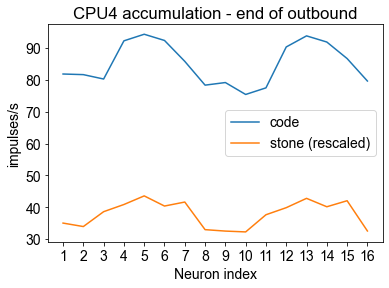

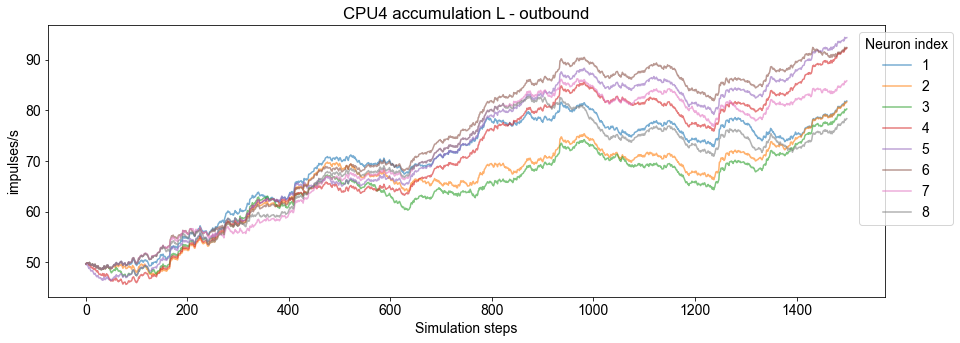

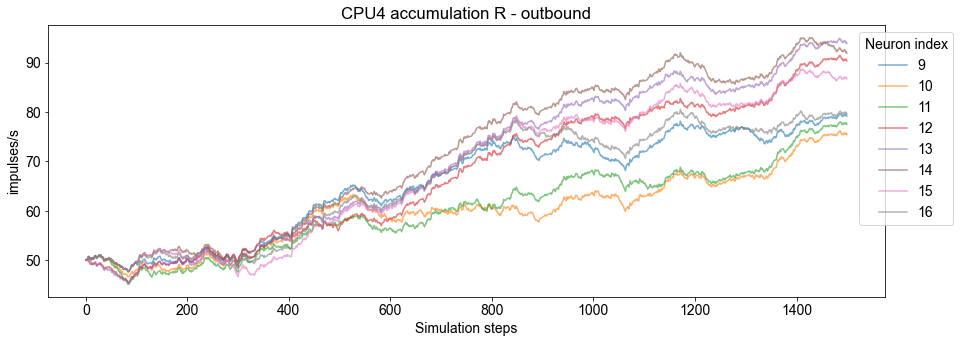

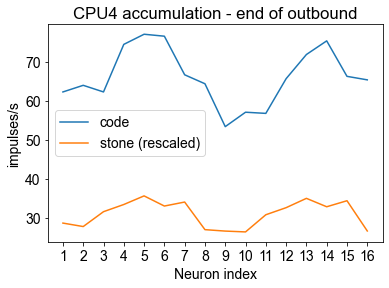

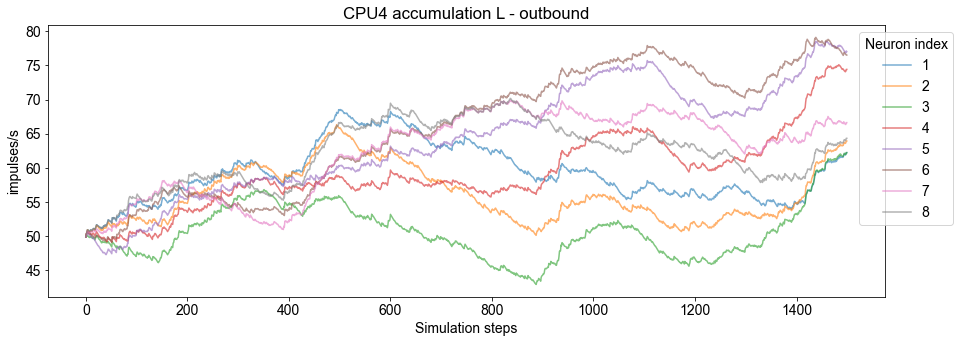

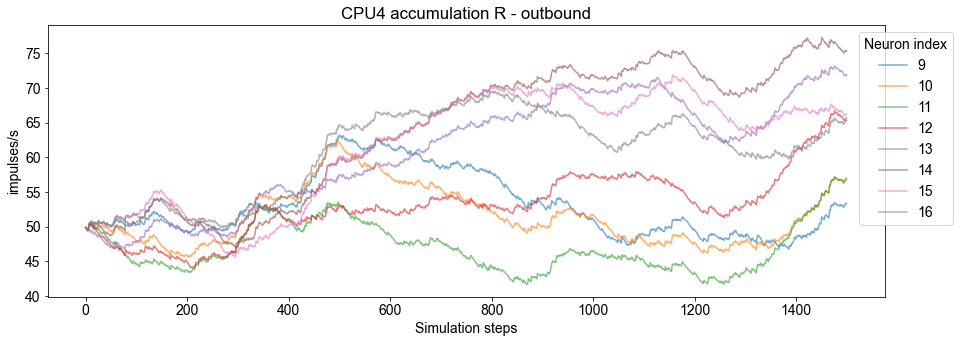

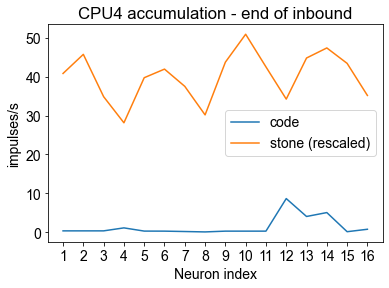

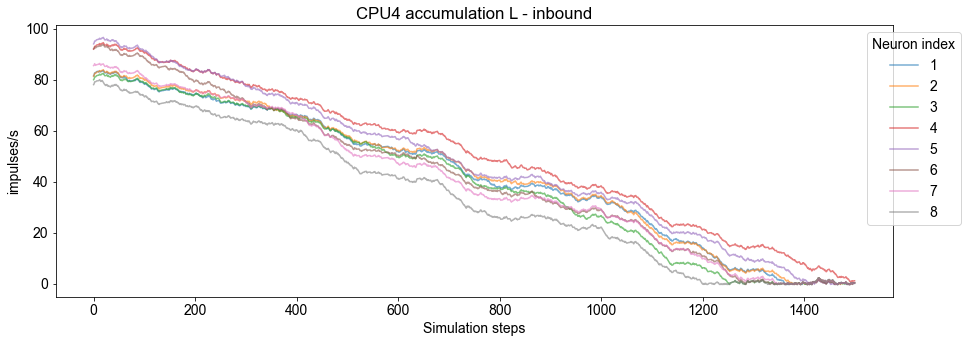

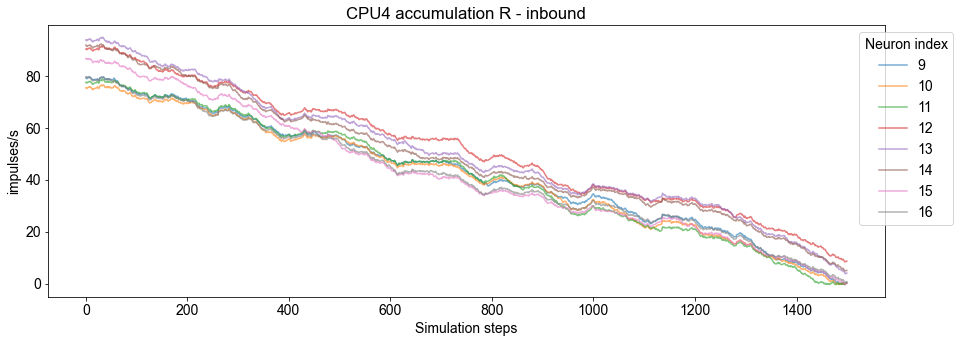

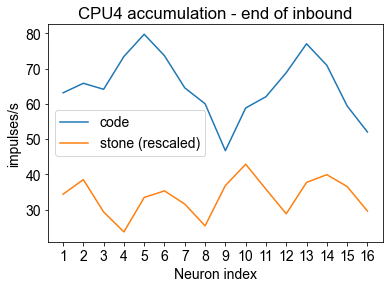

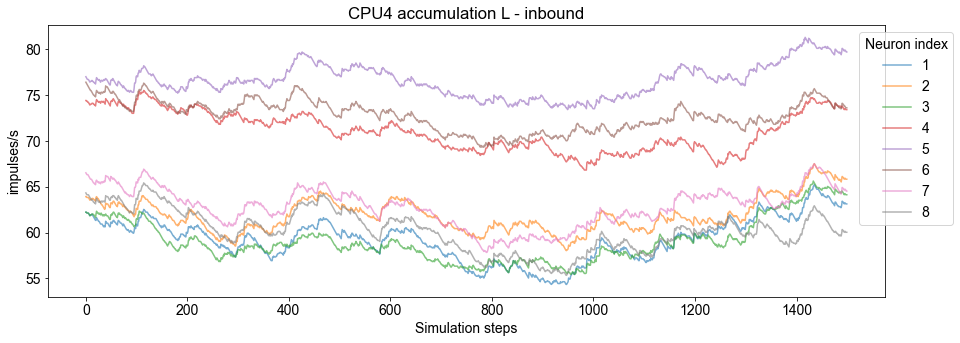

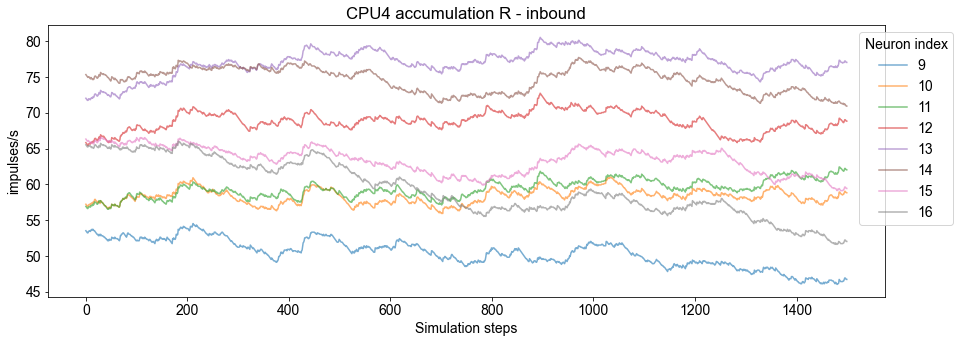

In [46]:
for _ in range(1):
    h, v, = cx_spiking.inputs.generate_route(T_outbound=1500, vary_speed=True)#, route_file=route_file, load_route=True)

    ######################################
    ### RATE BASED CX
    ######################################
    noise = 0.1
    cx = cx_rate.CXRatePontin(noise=noise)

    h, v, cx_log, cpu4_snapshot = trials.run_trial(logging=True,
                                                   T_outbound=T_outbound,
                                                   T_inbound=T_inbound,
                                                   noise=noise,
                                                   cx=cx,
                                                   route=(h[:T_outbound], v[:T_outbound]))
    
    spiking_cx_cpu4_1 = CX_SPIKING(eqs, threshold_eqs, reset_eqs,
                            h, v, 
                            mem_gain_outbound_1, decay_outbound_1, mem_gain_inbound_1, decay_inbound_1,
                            rotation_factor, time_step=20, T_outbound=T_outbound,
                            T_inbound=T_inbound, 
                            headings_method='vonmises', cpu4_method=1,
                            only_tuned_network=True)
    spiking_cx_cpu4_2 = CX_SPIKING(eqs, threshold_eqs, reset_eqs,
                            h, v, 
                            mem_gain_outbound_2, decay_outbound_2, mem_gain_inbound_2, decay_inbound_2,
                            rotation_factor, time_step=20, T_outbound=T_outbound,
                            T_inbound=T_inbound, 
                            headings_method='cosine', cpu4_method=2,
                            only_tuned_network=True)

    spiking_cx_cpu4_1.run_outbound()
    spiking_cx_cpu4_1.run_inbound()

    spiking_cx_cpu4_2.run_outbound()
    spiking_cx_cpu4_2.run_inbound()
    
    cx_spiking.plotting.plot_memory_outbound(spiking_cx_cpu4_1, cx_log)
    cx_spiking.plotting.plot_memory_outbound(spiking_cx_cpu4_2, cx_log)
    
    cx_spiking.plotting.plot_memory_inbound(spiking_cx_cpu4_1, cx_log)
    cx_spiking.plotting.plot_memory_inbound(spiking_cx_cpu4_2, cx_log)